# **Problem description**

Assume we want to minimise $f(x_1,x_2)=(x_1^2+x_2^2)$, but we don’t know the specific form of the function (this is a simplified case that may represent a unit operation or process). 
Not knowing the form of a function makes it difficult to optimise.

We first sample it at $x_1=3,x_2=2$ and get $f(3,2)=13$. We can do this as many times as we want for values of $x_1,x_2$. Using many of these values we can use some other function (a neural network, a gaussian process, a quadratic function) to fit our inputs $(x_1,x_2)_i$ to our outputs $f_i$, where $i$ is an individual evaluation. 

This new function, $\hat{f}$, is an approximation of the function $f$. 

Because we have a mathematical expression for $\hat{f}$ and know it's derivatives and we can now optimise efficiently.

Assume we locate a set of optimal values $x_1^*$ and $x_2^*$ which minimise $\hat{f}$. We then input these two values into $f$, i.e. $f(x^*, y^*)$.

If $||f_{approx}(x^*, y^*) - f(x^*, y^*)||\leq \text{tol}$, It means our approximate function is close enough to our real function, and since we have optimised your approximate function, we can assume that we have optimised our underlying function $f$. If however, the difference between your true function $f$ and your approximate function $\hat{f}$ at $x_1^*, x_2^*$ is still large then we continue to sample, and repeat the process until we have a small error. Notice that where, and how to sample our underlying function is a whole issue in itself.

In [47]:
# importing libraries
from IPython.core.display import HTML as Center
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### **Rosenbrock Function**

$$f(x,y) = 100  (y-x^2)^2 + (1-x)^2$$

This is the function we only have access to the outputs of.

In [52]:
def f_rosenbrock(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

## **Plotting routines**

The below code allows to visualize the function.

In [64]:
n_points = 200
# Generate input data
x_1      = np.linspace(-10.048, 10.048, n_points)         
x_2      = np.linspace(-10.048, 10.048, n_points)
X_1,X_2  = np.meshgrid(x_1,x_2)
# Compute the output
f        = f_rosenbrock([X_1,X_2])

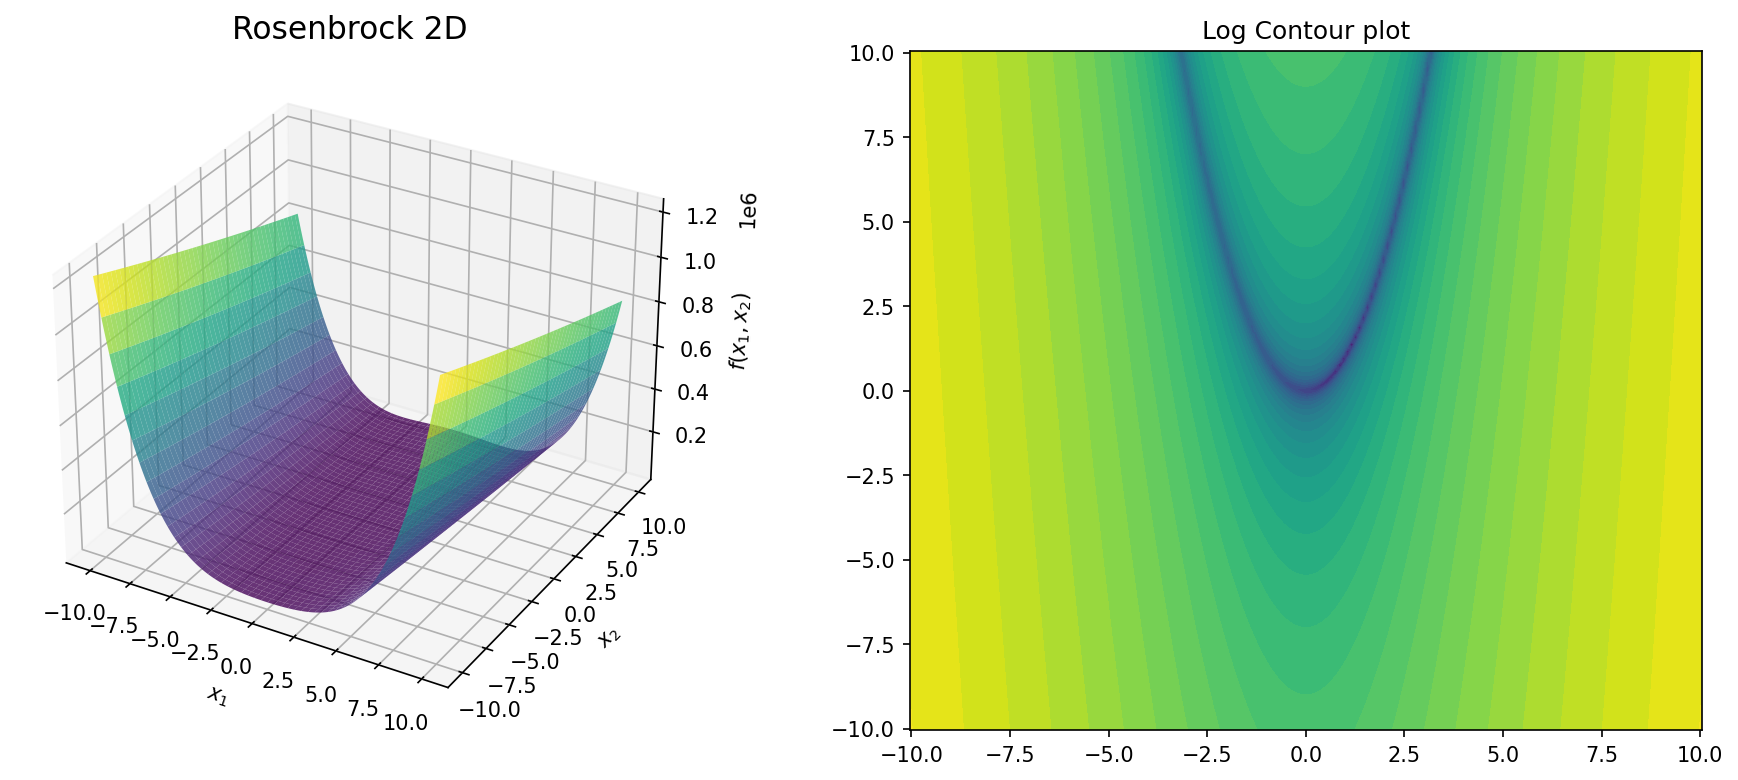

In [72]:
# setting up plot
fig = plt.figure(figsize=(15,6),dpi=150)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# labels and titles
plt.title('Rosenbrock 2D ', fontsize=15)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1,x_2)$')
# plot surface 
ax.plot_surface(X_1, X_2, f, linewidth=2, alpha=0.8,cmap=cm.viridis)

# add contour plot
ax = fig.add_subplot(1, 2, 2)
CS = ax.contourf(X_1,X_2,np.log(f), 40)
ax.set_title('Log Contour plot')
plt.show()

## Your code

Create an algorithm that samples the function, and fits a quadratic expression (e.g. $\hat{f}:=e+ax_1+bx_2+cx_1^2+dx_2^2$), which can be optimized, to in turn optimise the rosebrock function. Your algorithm should look something like this:

---
**Input**: Initial function bounds ${\bf x}^{ub},{\bf x}^{lb}$, define number of samples per iteration $n_s$, define number of iterations $n_i$, define a true function $f$ (for example $100  (x_2-x_1^2)^2 + (1-x_1)^2$ -  which you assume to be unknown), and some "machine learning" or "surrogate" function $\hat{f}$ (for example $\hat{f}:=e+ax+by+cx^2+dy^2$) 

---

- Randomly sample your function $n_s$ times within bounds ${\bf x}^{ub},{\bf x}^{lb}$ 
- For $i$ in $n_i$ iterations:
    - Sample your true function $f$ randomly $n_s$ times within some bounds ${\bf x}^{ub}_i,{\bf x}^{lb}_i$ 
    - Use the samples $n_s$ to determine coefficients from your approximate function $\hat{f}$. This is generally formulated as an optimization problem, for example least squares: $$\min_{a,b,c,d,e} \quad \sum_{i=1}^{n_s}(f({\bf x}_i)-\hat{f}({\bf x}_i,a,b,c,d,e))^2$$

    - Optimise your approximate function $\hat{f}$, for example: $${\bf x}_i^*:=\text{arg}\min_{\bf x} \quad \hat{f}({\bf x})$$
    This can be done however you wish, but remember you can take advantage of gradients and the form of your approximation. Options include using [Scipy's ```minimize``` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

    - Centre your bounds around ${\bf x}_i^*$ and reduce ${\bf x}^{ub}_i,{\bf x}^{lb}_i$, for example:
$${\bf x}^{ub}_{i+1}:={\bf x}_i^*+{\bf x}^{ub}_{i}/2$$
$${\bf x}^{lb}_{i+1}:={\bf x}_i^*-{\bf x}^{lb}_{i}/2$$
This step helps convergence, think about how you can change the bounds you operate in depending on how good your approximation is. Do you want it to shrink every iteration? 

--- 
